In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
import time
from sklearn.mixture import GaussianMixture

In [3]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = datasets.FashionMNIST('Data_FashionMNIST/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('DATA_FashionMNIST/', download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

cuda


In [7]:
# Reshape images into vectors
def flatten_images(images):
    return images.view(images.size(0), -1)

# Convert images to numpy arrays
def images_to_numpy(images):
    return images.numpy()

# Extract and flatten images from the training set
all_images = []
for images, _ in trainLoader:
    flattened_images = flatten_images(images)
    numpy_images = images_to_numpy(flattened_images)
    all_images.append(numpy_images)
all_images = np.concatenate(all_images)

# Fit a Gaussian Mixture Model
n_components = 10  # Adjust the number of components as needed
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.fit(all_images)

GaussianMixture(n_components=10)

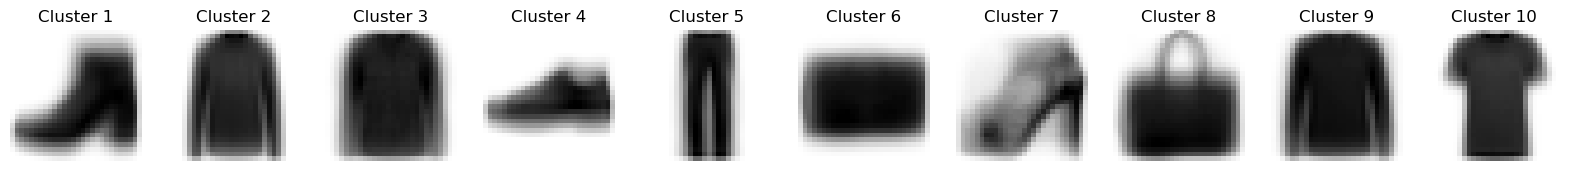

In [9]:
# Visualize the cluster centers as images
fig, axs = plt.subplots(1, n_components, figsize=(20, 5))
for i in range(n_components):
    cluster_center = gmm.means_[i]
    image = cluster_center.reshape(28, 28)  # Reshape to image shape
    axs[i].imshow(image, cmap='gray_r')
    axs[i].axis('off')
    axs[i].set_title(f'Cluster {i+1}')
plt.show()